# Module 4 & 5 - Data Visualization and Interpretation

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

 Diamonds
 Analyze diamonds by their cut, color, clarity, price, and other attributes

Index counter
carat - Carat weight of the diamond
cut - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
color - Color of the diamond, with D being the best and J the worst
clarity - How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
depth - depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
table - table%: The width of the diamond's table expressed as a percentage of its average diameter
price - the price of the diamond
x - length mm
y - width mm
z - depth mm

FROM internet information:
https://beyond4cs.com/grading/depth-and-table-values/

In [5]:
# read the csv dataset for diamonds

dsloc = 'P:/DATA_ANALYTIC/DATA/DIAMONDS/diamonds.csv'
df = pd.read_csv(dsloc)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
#rename the pound/hashtag(#) column so it doesn't cause further issues
df.rename(columns={'Unnamed: 0': 'Number'}, inplace =True)

In [7]:
#validate
df.head()

,Number,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# CHECK TO SEE HOW MANY RECORDS ARE IN INITIAL DATASET

In [8]:
df.tail()

,Number,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [9]:
#set INDEX
df.set_index('Number', inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# CLEAN THE DATA

In [10]:
dupe = df.duplicated() #creates list of True/False values
df[dupe] #shows rows where duplicated is True

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1009,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2026,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
2184,1.00,Fair,E,SI2,67.0,53.0,3136,6.19,6.13,4.13
2821,1.00,Fair,F,SI2,65.1,55.0,3265,6.26,6.23,4.07
3157,0.90,Very Good,I,VS2,58.4,62.0,3334,6.29,6.35,3.69
3705,1.00,Ideal,E,SI2,62.9,56.0,3450,6.32,6.30,3.97


# DELETE 146 RECORDS OF DUPLICATED DATA


In [11]:
#drops duplicate rows AND REASSIGNS THE DATAFRAME
df = df.drop_duplicates()

# CHECK NA VALUES AND DELETE; RESULTS REFLECTED NO NA VALUES

In [12]:

#drop rows with any missing data
df_no_missing = df.dropna()
df_no_missing

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


# FIND THE MAX PRICE AND DISPLAY THE ROW

In [13]:
xx = df['price'].max()
maxrowprice = df[df['price']==xx]
maxrowprice.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


## FIND THE MEDIAN PRICE AND DISPLAY ROW

In [14]:
xx = df['price'].median()
medianprice = df[df['price']==xx]
medianprice.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
51710,0.58,Ideal,F,VS2,61.8,57.0,2401,5.39,5.35,3.32
51711,0.72,Very Good,I,VS1,60.7,56.0,2401,5.78,5.82,3.52
51712,0.70,Very Good,F,SI1,63.5,56.0,2401,5.58,5.66,3.57
51713,0.78,Very Good,G,SI2,63.7,55.9,2401,5.82,5.85,3.72
51714,0.72,Very Good,E,SI2,62.2,59.0,2401,5.72,5.79,3.58


# FIND THE MIN PRICE AND DISPLAY THE ROW


In [15]:
xy = df['price'].min()
minrowprice = df[df['price']==xy]
minrowprice.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


# FIND THE LARGEST SIZE CARAT

In [16]:
xcarat = df['carat'].max()
maxrowcarat = df[df['carat']==xcarat]
maxrowcarat.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


## FIND THE MEDIAN SIZE CARAT

In [17]:
xz = df['carat'].median()
mediancarat = df[df['carat']==xz]
mediancarat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
91,0.7,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
93,0.7,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50
96,0.7,Good,E,VS2,57.5,58.0,2759,5.85,5.90,3.38
97,0.7,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40
119,0.7,Ideal,E,VS2,60.7,58.0,2762,5.73,5.76,3.49


# FIND THE SMALLEST SIZE CARAT

In [18]:
xcarat = df['carat'].min()
minrowcarat = df[df['carat']==xcarat]
minrowcarat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
15,0.2,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
31592,0.2,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
31593,0.2,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24
31594,0.2,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32
31595,0.2,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28


# DESCRIBES THE DATA

In [19]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Groups the data by clarity with an average value to each clarity category

In [20]:
df.groupby('clarity')
#add a stats or math function to it
df['price'].groupby(df['clarity']).mean()


clarity
I1      3925.275676
IF      2870.569507
SI1     3996.165132
SI2     5057.455410
VS1     3841.611329
VS2     3927.741516
VVS1    2526.602961
VVS2    3286.532437
Name: price, dtype: float64

In [21]:
# PIVOT TABLE INDEXED ON CLARITY AND REFLECTING AVERAGE PRICE FOR EACH CLARITY CATEGORY
pd.pivot_table(df, index="clarity", values="price")

,price
clarity,
I1,3925.275676
IF,2870.569507
SI1,3996.165132
SI2,5057.455410
VS1,3841.611329
VS2,3927.741516
VVS1,2526.602961
VVS2,3286.532437


In [22]:
# PIVOT TABLE INDEXED ON CLARITY AND REFLECTING THE AVERAGE CARAT SIZE
pd.pivot_table(df, index="clarity", values=["carat"])

,carat
clarity,
I1,1.283527
IF,0.505645
SI1,0.850407
SI2,1.076402
VS1,0.727436
VS2,0.764276
VVS1,0.503696
VVS2,0.596527


# PLOT THE DATA 

## This shows a plot graph with Table (face of the diamond) vs Price of diamonds.
## Conclusion with this plot graphic is the majority of the Tables (face size of the diamond) lie between 50mm and 70mm ranging in price from 326 dollars to 18,823 dollars.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


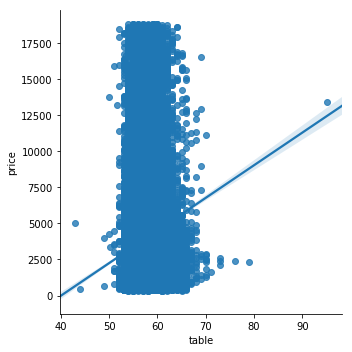

In [23]:
#clarity vs. price
sns.lmplot(x='table', y='price', data=df)

## This is Carat vs. Price of the diamonds.
## Conclusion there seems to be a positive relationship between the carat and price of the 
## diamond and all diamonds appear to be under $20,000.

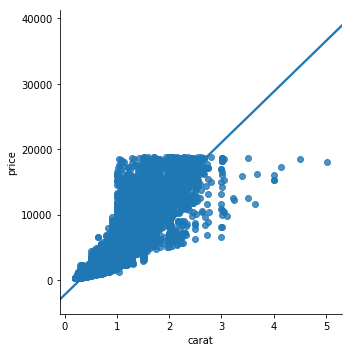

In [24]:
#Carat Vs. price 
sns.lmplot(x='carat', y='price', data=df)

## This scatter plot shows the relationship of carats to price and the breakdown of the cut in the relationship.
## Conclusion is the majority of diamonds appear to be either Fair or Very Good cut diamonds and Ideal diamonds are under 3 carats.

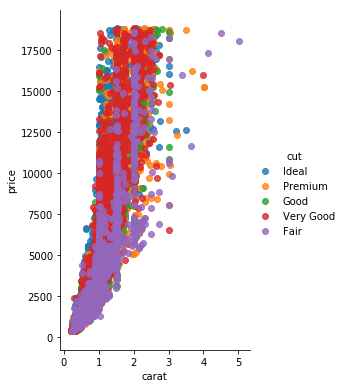

In [25]:
#add more details to scatterplot
sns.lmplot(x='carat', y='price',data=df, height=5.5,aspect=.7,
           fit_reg=False, #remove regression line
           hue='cut')   #color by cut of the diamond

## This is a boxplot showing the relationship of color to carat.
## Conclusion with this data is more diamonds are of I color (and under 3 carats). The larger carat diamonds have a J color

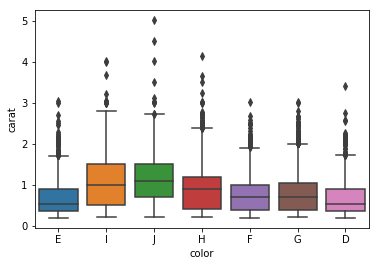

In [26]:
#boxplot showing stats for each characteristic
box_df = df.drop(['x','y','z'],axis=1)
sns.boxplot(x='color', y='carat', data=box_df)

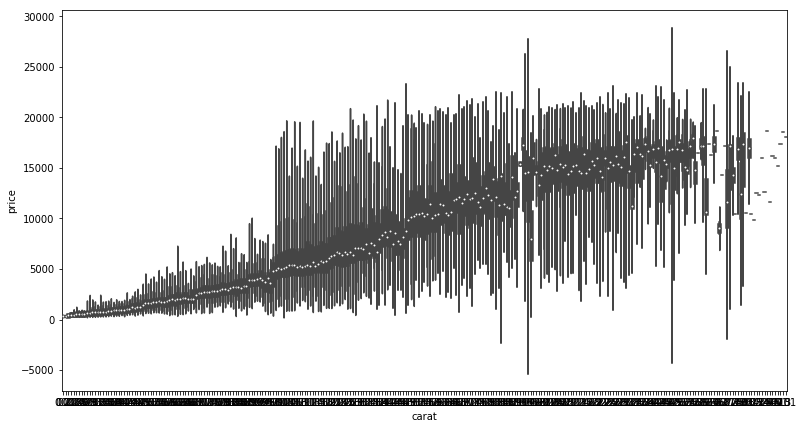

In [27]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='carat', y='price', data=df)

## This shows the clairity of the diamond in relationship to the carat.
## Conclusion from this data is the larger carat diamonds are I1 in clarity and under 1 carat diamonds are mostly VVS1.


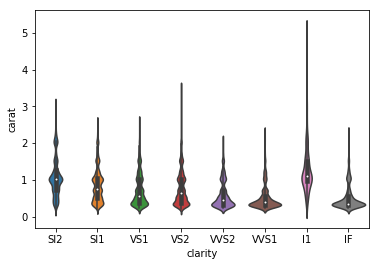

In [28]:
sns.violinplot(x='clarity',y='carat',data=df)

### SCATTER PLOT SHOWING THE RELATIONSHIP OF PRICE AND CARAT WITH CLARITY OF DIAMONDS.
### THIS SHOWS A STRONG POSITIVE RELATIONSHIP 

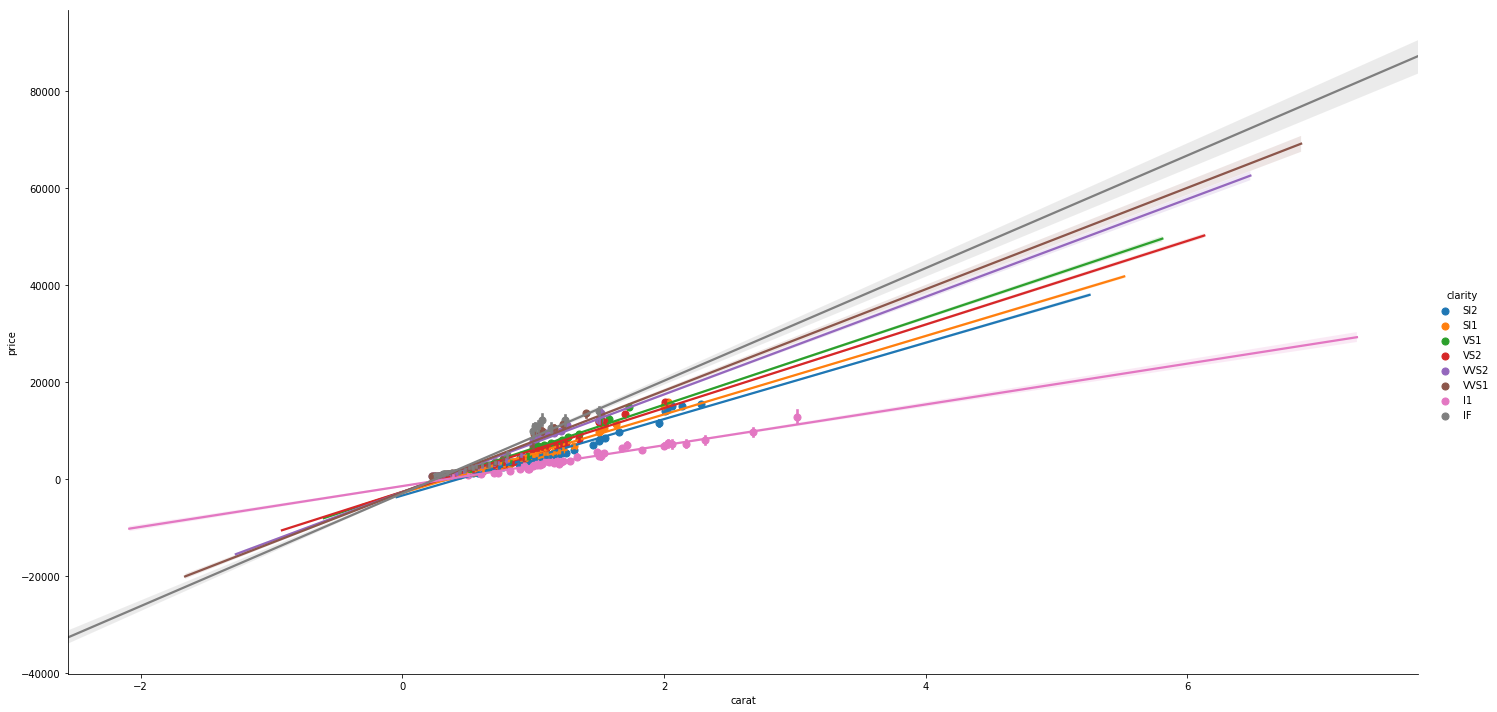

In [29]:
g = sns.lmplot(x='carat', y='price', hue='clarity', x_bins=50, height=10,aspect=2, data=df)

### Visualize all Types by Stat

In [30]:
#create a column that contains all stat types and a column for their corresponding value
melt_df = pd.melt(df, 
                  id_vars=['clarity', 'cut', 'color'], #column to keep
                  var_name="Stat")

melt_df.head()

,clarity,cut,color,Stat,value
0,SI2,Ideal,E,carat,0.23
1,SI1,Premium,E,carat,0.21
2,VS1,Good,E,carat,0.23
3,VS2,Premium,I,carat,0.29
4,SI2,Good,J,carat,0.31


In [31]:
#melted datframe has 6 times the amount of rows as original stats dataframe
#6 rows for each pokemon for each stat type
print(df.shape)
print(melt_df.shape)

(53794, 10)
(376558, 5)


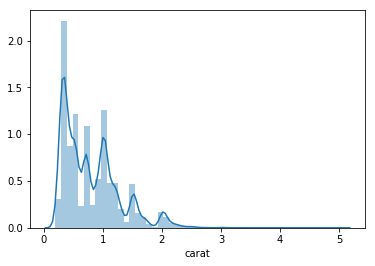

In [32]:
#create a histogram 
sns.distplot(df['carat'])

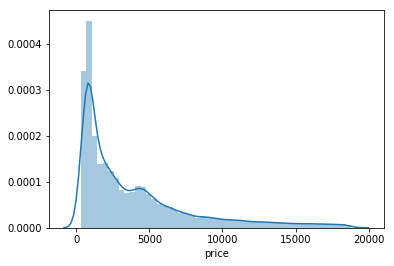

In [33]:
sns.distplot(df['price'])

### SUMMARY CONCLUSION ABOUT THE DIAMOND CSV DATA
 Initially 53,940 records.
 146 records were duplicates and removed resulting in 53,794 records to analyze.
 The diamonds range in price from 346 to 18,823 dollars.
 The carat size ranges from .2 cts to 5.01 cts. 
 There is a positive relationship between Price and Carat.
 The majority of the diamonds are Fair to Very Good cuts, I in color, and SI1 clarity.  
 The average size of diamond is ~ .80 cts. and average price of 3933 dollars however it is not a true representation of the diamond data. The histograms of price and carat reflect the diamond data is not a Normal Distribution but a Poisson Distribution which means the data is heavily represented in one area more than the rest of the data. Using the median data would be a more acurate representation of the data so therefore the Median size of diamond is ~ .70 cts and median price is 2401 dollars.

Source: https://elitedatascience.com/python-seaborn-tutorial

# REGRESSION ANALYSIS FOR DIAMOND DATASET  


Find the Correlation between varaibles

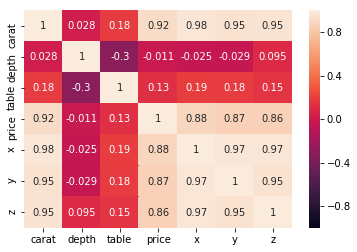

In [34]:
#show correlation of stats via heatmap
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

LINEAR REGRESSION: In above correlation, We can see that price is highly correlated with carat, x, y, z.

In [35]:
import statsmodels.formula.api as smf

In [36]:
result = smf.ols('price ~ carat + x + y + z', data=df).fit()

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 7.874e+04
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:45:26   Log-Likelihood:            -4.7056e+05
No. Observations:               53794   AIC:                         9.411e+05
Df Residuals:                   53789   BIC:                         9.412e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2009.2662    105.124     19.113      0.000    1803.222    2215.310
carat        1.03e+04     63.430    162.352      0.000    1.02e+04    1.04e+04
x           -905.4305     40.576    -22.314      0.000    -984.961    -825.900
y            164.1264     25.846      6.350      0.000     113.468     214.785
z           -577.5131     39.294    -14.697      0.000    -654.530    -500.496
==============================================================================
Omnibus:                    14331.759   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           344524.193
Skew:                           0.732   Prob(JB):                         0.00
Kurtosis:                      15.311   Cond. No.                         172.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
result = smf.ols('price ~ carat + y ', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.533e+05
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:45:26   Log-Likelihood:            -4.7118e+05
No. Observations:               53794   AIC:                         9.424e+05
Df Residuals:                   53791   BIC:                         9.424e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -540.6625     75.308     -7.179      0.000    -688.266    -393.059
carat       8774.6775     45.803    191.573      0.000    8684.903    8864.452
y           -440.5733     19.000    -23.188      0.000    -477.813    -403.333
==============================================================================
Omnibus:                    14857.589   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237726.947
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                      13.139   Cond. No.                         79.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
result = smf.ols('price ~ x + y + z  ', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 6.457e+04
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:15:55   Log-Likelihood:            -4.8129e+05
No. Observations:               53794   AIC:                         9.626e+05
Df Residuals:                   53790   BIC:                         9.626e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.413e+04     41.833   -337.664      0.000   -1.42e+04    -1.4e+04
x           2795.2005     40.976     68.215      0.000    2714.887    2875.514
y            218.4381     31.547      6.924      0.000     156.607     280.270
z            222.0830     47.586      4.667      0.000     128.813     315.353
==============================================================================
Omnibus:                    18703.661   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141725.844
Skew:                           1.472   Prob(JB):                         0.00
Kurtosis:                      10.386   Cond. No.                         65.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""